In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [5]:
df = pd.read_csv("cleanfootball.csv")

In [7]:
df.head()

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,0.335463,9390,42,5,13,15000000,70000000
1,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,0.207055,1304,510,58,1,1500000,22000000
2,2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.924658,292,697,84,4,600000,6000000
3,3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,6408,175,22,9,50000000,50000000
4,4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,5031,238,51,21,40000000,80000000


In [11]:
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_columns.append(column)
    elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == object:
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


Categorical columns: ['team', 'name', 'position']
Numerical columns: ['Unnamed: 0', 'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value']


In [15]:
for c in categorical_columns:
    print(df[c].value_counts())

team
Jeonbuk Hyundai Motors    46
Daejeon Hana Citizen      46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 11
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
name
Paulinho              6
Guilherme             5
Vitinho               5
João Pedro            4
Fernando              4
                     ..
Janderson             1
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Alexander Badolato    1
Name: count, Length: 10576, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1352
Goalkeeper                    1227
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     899
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     768
Attack-LeftWinger              714
Att

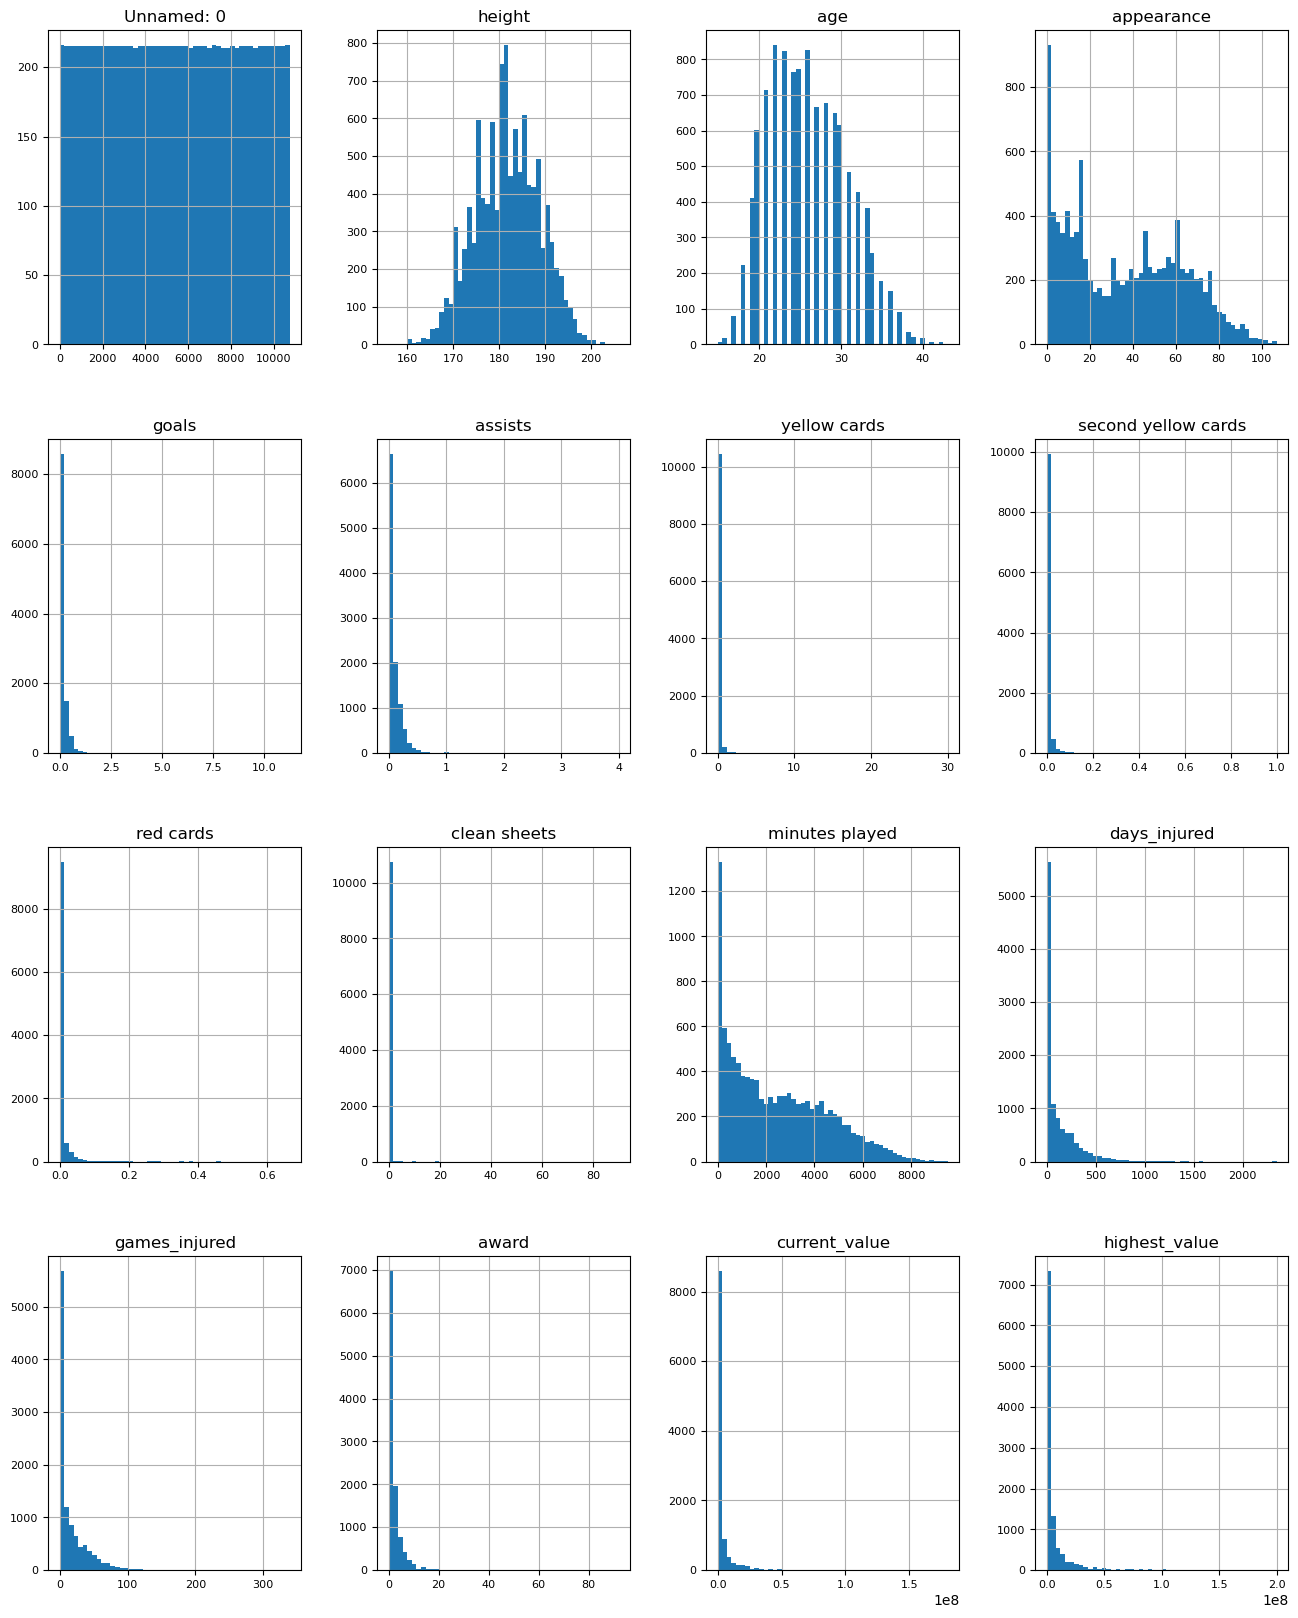

In [19]:
df[numerical_columns].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Feature engineering:

In [24]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [91]:
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,clean sheets,minutes played,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,0.335463,9390,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,0.207055,1304,...,False,False,False,True,False,False,False,False,False,False
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.924658,292,...,False,False,False,True,False,False,False,False,False,False
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,6408,...,True,False,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,5031,...,True,False,False,False,False,False,False,False,False,False


In [26]:
df.shape

(10746, 10979)

In [28]:

X = df.drop(['current_value'], axis=1) # defining X features
y = (df['current_value'] > df['current_value'].median()).astype(int) # target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Building and training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [36]:
y_pred = model.predict(X_test_scaled)

In [50]:
coeff_df = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,-1.032027
height,-0.164842
age,-0.085657
appearance,0.906572
goals,0.223099
...,...
position_midfield-AttackingMidfield,0.260675
position_midfield-CentralMidfield,0.177666
position_midfield-DefensiveMidfield,0.175529
position_midfield-LeftMidfield,-0.171999


In [58]:
coeff_df.head()

,Coefficient
Unnamed: 0,-1.032027
height,-0.164842
age,-0.085657
appearance,0.906572
goals,0.223099


## Evaluation:
> using: 
    1. accuracy
    2. conf_matrix
    3. precision
    4. recall
    5. f1

In [73]:
accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.8013953488372093

In [67]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [69]:
conf_matrix

array([[955, 180],
       [247, 768]])

In [79]:
precision = precision_score(y_test,y_pred)

In [81]:
precision

0.810126582278481

In [83]:
recall =recall_score(y_test,y_pred)

In [85]:
recall

0.7566502463054188

In [87]:
f1 = f1_score(y_test,y_pred)

In [89]:
f1

0.782475802343352